Principal Component 1: 24.89%
Principal Component 2: 11.39%
Principal Component 3: 8.54%
Principal Component 4: 5.76%
Principal Component 5: 4.53%
Principal Component 6: 4.05%
Principal Component 7: 3.44%
Principal Component 8: 2.91%
Principal Component 9: 2.17%
Principal Component 10: 1.91%
Principal Component 11: 1.63%
Principal Component 12: 1.23%
Principal Component 13: 1.09%
Principal Component 14: 1.02%
Principal Component 15: 0.94%
Principal Component 16: 0.89%
Principal Component 17: 0.86%
Principal Component 18: 0.75%
Principal Component 19: 0.73%
Principal Component 20: 0.68%
Principal Component 21: 0.61%
Principal Component 22: 0.60%
Principal Component 23: 0.55%
Principal Component 24: 0.54%
Principal Component 25: 0.48%
Principal Component 26: 0.47%
Principal Component 27: 0.41%
Principal Component 28: 0.40%
Principal Component 29: 0.37%
Principal Component 30: 0.35%
Principal Component 31: 0.34%
Principal Component 32: 0.33%
Principal Component 33: 0.31%
Principal Compone

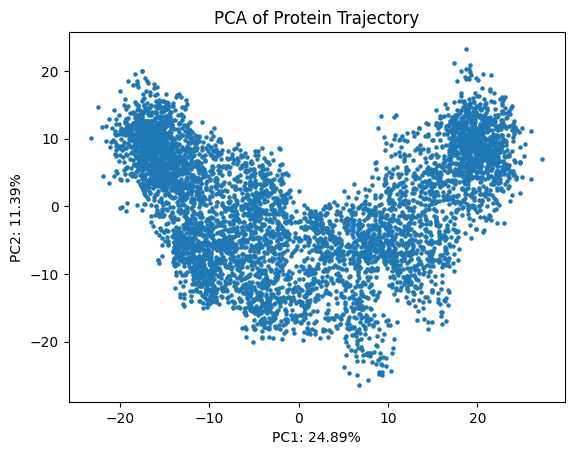

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import pca
import matplotlib.pyplot as plt
import numpy as np
from MDAnalysis.analysis import align
import warnings

warnings.filterwarnings('ignore')

# Load your trajectory and topology files
u = mda.Universe('WT_test.pdb', 'GProS_6wma_WT.arc')

# Align the structure
aligner = align.AlignTraj(u, u, select='name CA', in_memory=True).run()

# Perform PCA
pca_analysis = pca.PCA(u, select='name CA').run()

# Get the PCA components
components = pca_analysis.p_components

# Get the variance explained by each principal component
variance = pca_analysis.variance

# Normalize the variance to get the percentage of variance explained by each principal component
total_variance = np.sum(variance)
variance_percentages = (variance / total_variance) * 100

# Print the percentages of the principal components
for i, percentage in enumerate(variance_percentages):
    print(f"Principal Component {i+1}: {percentage:.2f}%")

# Project the trajectory onto the first two principal components
pca_projection = pca_analysis.transform(u.select_atoms('name CA'))

# Plot the projection
plt.scatter(pca_projection[:, 0], pca_projection[:, 1], s=5)  # s parameter controls the size of the points
plt.xlabel(f'PC1: {variance_percentages[0]:.2f}%')
plt.ylabel(f'PC2: {variance_percentages[1]:.2f}%')
plt.title('PCA of Protein Trajectory')
plt.show()